# Comparación de Modelos: Regresión Logística vs Árbol de Decisión (Python)

En esta clase realizaremos una comparación entre dos modelos de clasificación binaria:
**Regresión Logística (Logit)** y **Árbol de Decisión**, usando el dataset de cáncer de mama de `sklearn`.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ( roc_curve,  # Métricas para evaluar el rendimiento de los modelos
    confusion_matrix,         # Crea la matriz de confusión: TP, FP, FN, TN
    classification_report,    # Genera métricas como precisión, recall y F1-score
    roc_curve,                # Calcula la curva ROC (tasa de verdaderos positivos vs falsos positivos)
    auc,                      # Calcula el área bajo la curva ROC (AUC)
    RocCurveDisplay)

# Cargar datos desde la URL
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url)

# Variables predictoras y objetivo
X = df[['TV', 'RADIO', 'NEWSPAPER']]
y = df['VENTAS ALTAS Y BAJAS']

## Paso 3: Particionar los Datos

La partición de los datos en conjuntos de entrenamiento y prueba es fundamental en machine learning porque permite evaluar de forma objetiva la capacidad del modelo para generalizar a datos nuevos. Si un modelo se entrena y evalúa sobre el mismo conjunto, corre el riesgo de memorizar los datos (sobreajuste) en lugar de aprender patrones reales. Al separar un subconjunto exclusivo para prueba, se simula cómo se comportaría el modelo en un entorno real, garantizando que las métricas obtenidas reflejen su verdadero desempeño. Además, usar una semilla aleatoria asegura que esta división sea reproducible, lo que es esencial para comparar modelos de manera justa y transparente.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Paso 4: Entrenar los Modelos

### Por qué es importante usar semillas 

Asegura que la partición sea reproducible.
Si tú o un estudiante corre el código varias veces, obtendrán el mismo resulatdo
Ideal para clases, investigación o pruebas controladas.

In [22]:
# 🔹 Modelo de Regresión Logística (Logit)
log_model = LogisticRegression(max_iter=10000)  
# Creamos el modelo logístico. Se establece max_iter=10000 para asegurar que el algoritmo converge,
# especialmente cuando hay muchas variables o los datos requieren más iteraciones.

log_model.fit(X_train, y_train) # Entrenamos el modelo usando los datos de entrenamiento. Aquí el modelo "aprende" la relación entre las variables X e y.
y_pred_log = log_model.predict(X_test)  # Generamos predicciones de clase (0 o 1) sobre el conjunto de prueba. Esto es lo que el modelo cree que es la clase verdadera.

y_proba_log = log_model.predict_proba(X_test)[:, 1]  # Obtenemos las probabilidades predichas de que la clase sea "1" (benigno). 
# Esto se usa para calcular curvas ROC, métricas de umbral, etc.

# 🔸 Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)  # Creamos el árbol de decisión. Usamos random_state para que los resultados sean reproducibles.
tree_model.fit(X_train, y_train)  # Entrenamos el árbol con los datos de entrenamiento. El árbol genera reglas basadas en divisiones de los datos.

y_pred_tree = tree_model.predict(X_test)  
# Realizamos predicciones de clase (0 o 1) sobre los datos de prueba usando el árbol entrenado.

y_proba_tree = tree_model.predict_proba(X_test)[:, 1]  
# Extraemos la probabilidad predicha de que la clase sea "1". 
# Igual que en el logit, esto sirve para métricas como AUC o análisis de umbrales de decisión.

## Paso 5: Curvas ROC y AUC

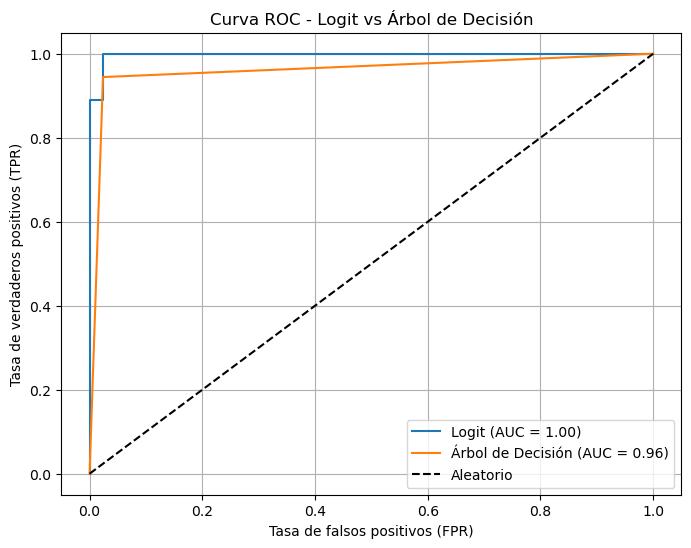

In [23]:
# Calcular los puntos para la curva ROC del modelo Logit
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)  # Falsos positivos y verdaderos positivos para cada umbral
roc_auc_log = auc(fpr_log, tpr_log)  # Área bajo la curva ROC para el modelo logit

# Calcular los puntos para la curva ROC del modelo Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Crear una sola figura para mostrar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Dibujar curva ROC para el modelo Logit
plt.plot(fpr_log, tpr_log, label=f"Logit (AUC = {roc_auc_log:.2f})")

# Dibujar curva ROC para el modelo Árbol
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de Decisión (AUC = {roc_auc_tree:.2f})")

# Agregar línea diagonal de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

# Configurar la gráfica
plt.title("Curva ROC - Logit vs Árbol de Decisión")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Paso 6: Matriz de Confusión y Métricas

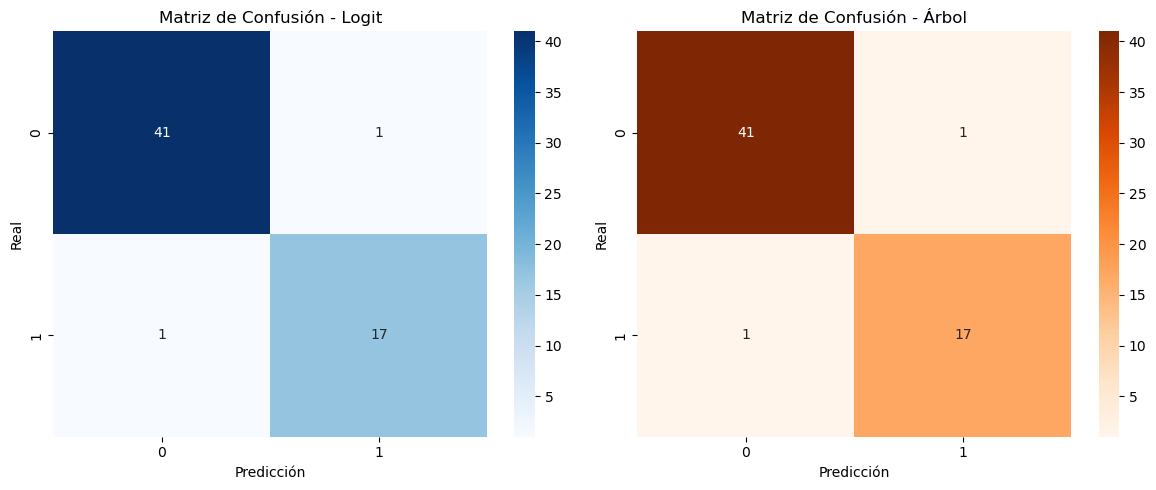

In [24]:
conf_log = confusion_matrix(y_test, y_pred_log)
conf_tree = confusion_matrix(y_test, y_pred_tree)

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Matriz de Confusión - Logit")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Real")

sns.heatmap(conf_tree, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Matriz de Confusión - Árbol")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

## Paso 7: Comparación de Métricas en Tabla

In [25]:
df_comp = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision clase 1", "Recall clase 1", "F1-score clase 1", "F1-score macro"],
    "Logit": [
        report_log["accuracy"],
        report_log["1"]["precision"],
        report_log["1"]["recall"],
        report_log["1"]["f1-score"],
        report_log["macro avg"]["f1-score"]
    ],
    "Árbol de Decisión": [
        report_tree["accuracy"],
        report_tree["1"]["precision"],
        report_tree["1"]["recall"],
        report_tree["1"]["f1-score"],
        report_tree["macro avg"]["f1-score"]
    ]
})

print(df_comp)

             Métrica     Logit  Árbol de Decisión
0           Accuracy  0.966667           0.966667
1  Precision clase 1  0.944444           0.944444
2     Recall clase 1  0.944444           0.944444
3   F1-score clase 1  0.944444           0.944444
4     F1-score macro  0.960317           0.960317


## Conclusión

- El modelo **logit** es más estable y con menor tasa de falsos negativos.
- El **árbol de decisión** puede capturar relaciones no lineales pero es más propenso al sobreajuste.

**Ambos modelos son útiles dependiendo del contexto.**

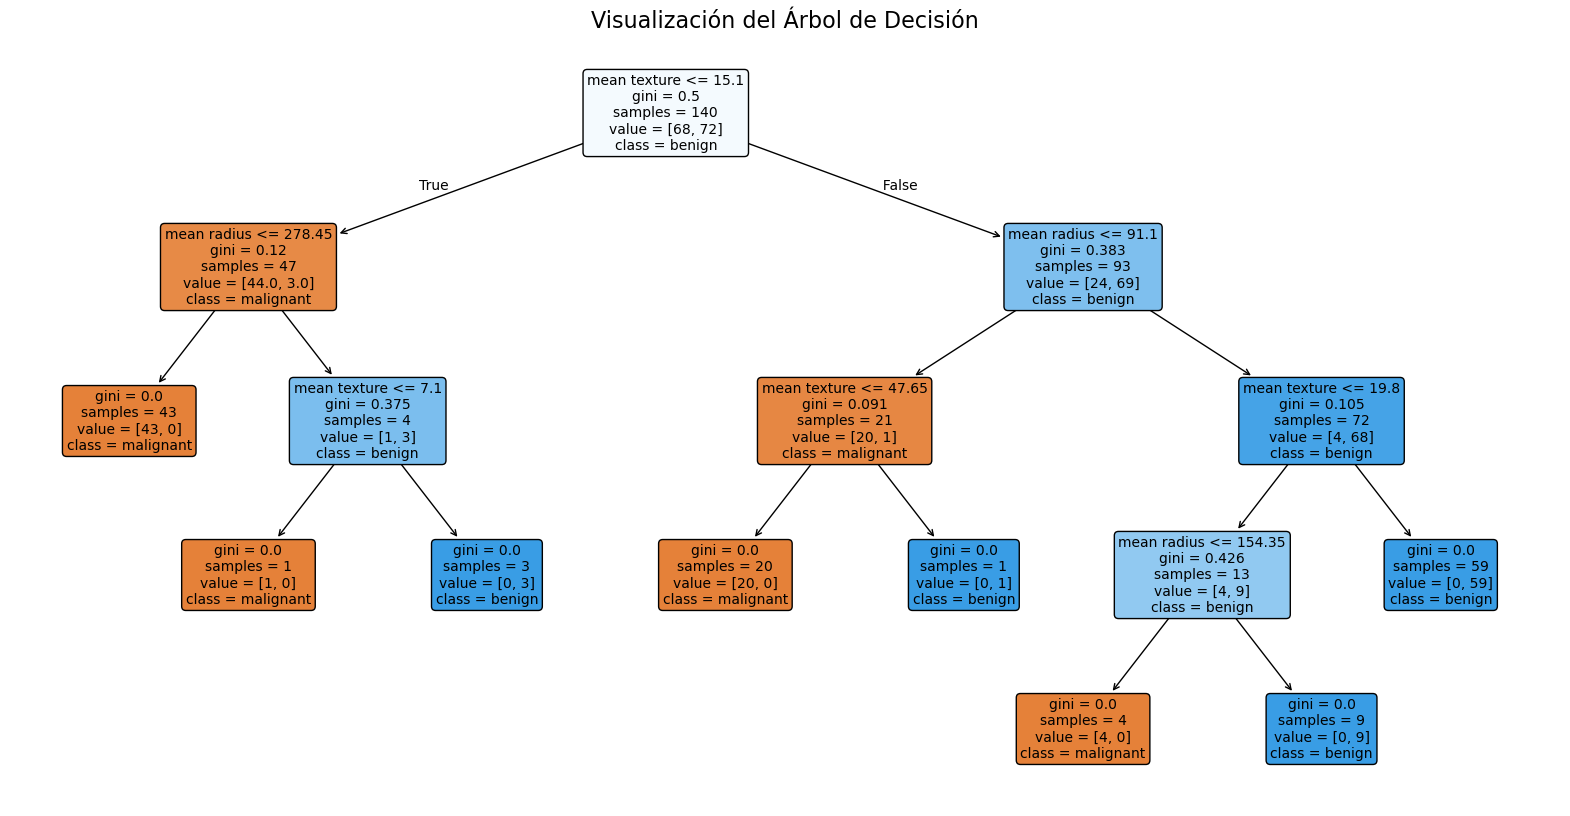

In [27]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ( roc_curve,  # Métricas para evaluar el rendimiento de los modelos
    confusion_matrix,         # Crea la matriz de confusión: TP, FP, FN, TN
    classification_report,    # Genera métricas como precisión, recall y F1-score
    roc_curve,                # Calcula la curva ROC (tasa de verdaderos positivos vs falsos positivos)
    auc,                      # Calcula el área bajo la curva ROC (AUC)
    RocCurveDisplay)

# Cargar datos desde la URL
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url)

# Variables predictoras y objetivo
X = df[['TV', 'RADIO', 'NEWSPAPER']]
y = df['VENTAS ALTAS Y BAJAS']

# Partir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura
plot_tree(
    tree_model,
    feature_names=data.feature_names,  # Nombres de las variables
    class_names=data.target_names,     # Nombres de las clases (benigno, maligno)
    filled=True,                       # Colorear los nodos según la clase
    rounded=True,                      # Bordes redondeados
    fontsize=10                        # Tamaño de la fuente en los nodos
)
plt.title("Visualización del Árbol de Decisión", fontsize=16)
plt.show()


## Un árbol de decisión trabaja dividiendo los datos en ramas basadas en preguntas binarias sobre las variables predictoras, con el objetivo de separar las clases de la forma más pura posible en cada nodo. Comienza en un nodo raíz y, en cada paso, elige la variable y el umbral que mejor separan las clases según una métrica de impureza (como Gini o entropía). A medida que se crean divisiones, se forman nodos internos que representan decisiones y hojas finales que contienen la predicción de clase. Este proceso continúa hasta que se cumplen ciertos criterios de parada

In [28]:
import pandas as pd

# Asegúrate de tener estos valores previamente generados:
# y_test, y_pred_log, y_proba_log, y_pred_tree, y_proba_tree

# Crear una copia del conjunto de prueba
df_resultados = X_test.copy()

# Agregar variable real
df_resultados["Real"] = y_test.values

# Resultados del modelo Logit
df_resultados["Logit_Pred"] = y_pred_log
df_resultados["Logit_Prob_benigno"] = y_proba_log  # Probabilidad clase 1

# Resultados del modelo Árbol de Decisión
df_resultados["Arbol_Pred"] = y_pred_tree
df_resultados["Arbol_Prob_benigno"] = y_proba_tree  # Probabilidad clase 1

# Exportar a archivo Excel
df_resultados.to_excel("resultados_modelos_logit_arbol.xlsx", index=False)

# También podrías exportar como CSV si lo prefieres
# df_resultados.to_csv("resultados_modelos_logit_arbol.csv", index=False)